### 数据预处理
 - 数据质量：缺失值处理、异常处理、重复数据
 - 数据结构：格式转化、数据合并

### 1. 删除重复数据，并输出去重前后的数据量
### 2. 缺失值处理
- 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
- 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
- 最后，再次看各列有无缺失值
### 3. 数据变换，将created_at、updated_at转为时间戳
### 4. 数据可视化
- 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

In [3]:
import pandas as pd
raw_data = pd.read_csv('github_bot_raw_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]

In [5]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('/Users/caolu/Desktop/github_bot_raw_data.csv')

# 获取行数和列数
rows, columns = df.shape
print(f"数据量: {rows}")
df = df.drop_duplicates()
df.to_csv('github_bot_raw_data_no_duplicates.csv', index=False)
rows, columns = df.shape
print(f"去重后数据量: {rows}")


数据量: 20358
去重后数据量: 19779


In [ ]:
df = pd.read_csv('/Users/caolu/DASE-Homework/24autumn-Homework/github_bot_raw_data_no_duplicates.csv')
df = df.drop(columns=['gravatar_id'])
df.to_csv('change2.csv', index=False)
missing_values = df.isnull().sum()
print(missing_values)

actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8982
blog                   11263
location                7080
email                  11739
hireable               16481
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64


In [10]:
df = pd.read_csv('/Users/caolu/DASE-Homework/24autumn-Homework/change2.csv')
boolean_columns = ['name', 'company', 'blog', 'location', 'email', 'hireable']  

for col in boolean_columns:
    df[col] = df[col].apply(lambda x: bool(x) if pd.notnull(x) else False)  # 将非空值转为布尔类型，空值则转为 False
df.to_csv('change3.csv', index=False)
missing_values = df.isnull().sum()
print(missing_values) 

actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                       0
company                    0
blog                       0
location                   0
email                      0
hireable                   0
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64


In [27]:
df = pd.read_csv('/Users/caolu/DASE-Homework/24autumn-Homework/change3.csv')
columns_to_convert = ['created_at', 'updated_at']
for col in columns_to_convert:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # errors='coerce' 将无法解析的日期转为 NaT
print(df[columns_to_convert])
df.to_csv('change3.csv', index=False)
print(df['created_at'].dtype)


                     created_at                updated_at
0     2011-09-26 17:27:03+00:00 2023-10-13 11:21:10+00:00
1     2015-06-29 10:12:46+00:00 2023-10-07 06:26:14+00:00
2     2008-08-29 16:20:03+00:00 2023-10-02 02:11:21+00:00
3     2014-05-20 18:43:09+00:00 2023-10-12 12:54:59+00:00
4     2012-08-16 14:19:13+00:00 2023-10-06 11:58:41+00:00
...                         ...                       ...
19774 2014-07-02 23:27:34+00:00 2023-08-15 16:38:34+00:00
19775 2017-12-06 21:56:31+00:00 2023-07-26 18:32:25+00:00
19776 2015-11-14 14:44:05+00:00 2022-08-23 21:09:49+00:00
19777 2021-11-23 18:55:29+00:00 2023-10-06 22:50:45+00:00
19778 2016-04-22 22:11:59+00:00 2022-07-07 19:48:21+00:00

[19779 rows x 2 columns]
datetime64[ns, UTC]


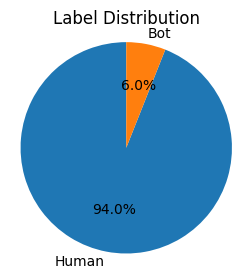

In [34]:
import matplotlib.pyplot as plt

df = pd.read_csv('change3.csv')  

label_counts = df['label'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Label Distribution')
plt.axis('equal') 
plt.show()

选择饼状图可以更好的直观显示出“Bot”和“Human”类型的占比，由图可知，github用户类型绝大多数为Human

datetime64[ns, UTC]


/var/folders/xs/9bqlm9cd7h7bsby1sbtnr7400000gn/T/ipykernel_94710/3251419052.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bot['year'] = df_bot['created_at'].dt.year


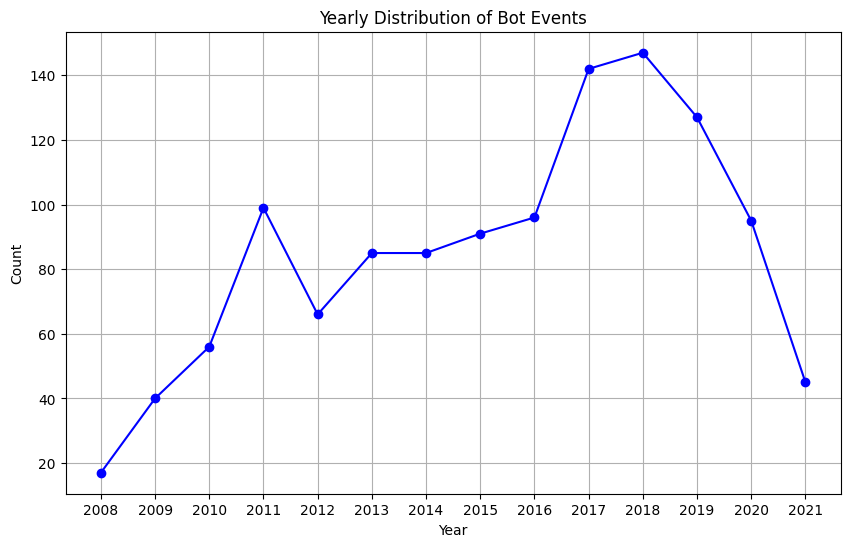

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('change3.csv')
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')  # 转换为 datetime 类型，无法转换的变为 NaT
print(df['created_at'].dtype)
df_bot = df[df['label'] == 'Bot']
df_bot['year'] = df_bot['created_at'].dt.year
yearly_counts = df_bot.groupby('year').size()
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', color='b')
plt.title('Yearly Distribution of Bot Events')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(yearly_counts.index)  
plt.grid(True)
plt.show()

 GitHub历史较长，用户注册时间前后不一，跨度较大，如果将时间精确到月/日，图表不清晰且信息复杂无意义。所以按照year来分类并分别计数，总体趋势如图，Bot用户注册量线逐渐升高，在2018年到达顶峰，后逐渐下降

datetime64[ns, UTC]


/var/folders/xs/9bqlm9cd7h7bsby1sbtnr7400000gn/T/ipykernel_94710/2614925846.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bot['year'] = df_bot['created_at'].dt.year


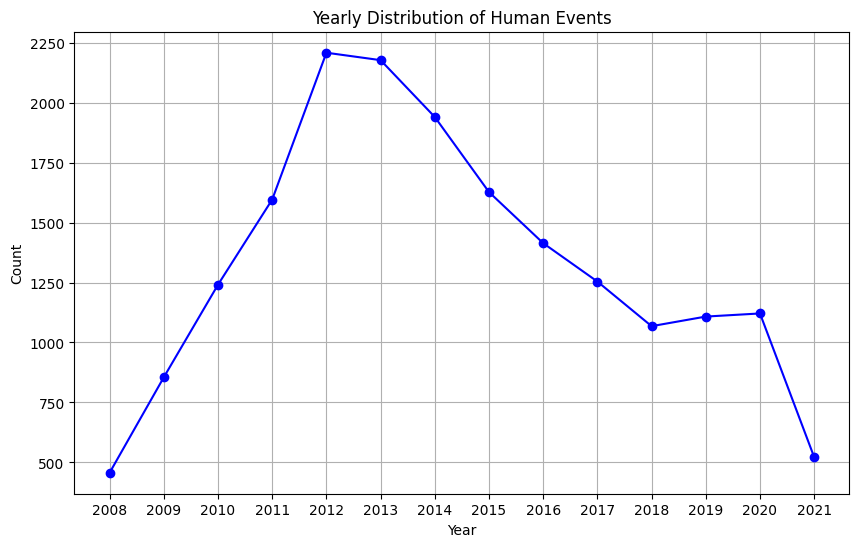

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('change3.csv')
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')  # 转换为 datetime 类型，无法转换的变为 NaT
print(df['created_at'].dtype)
df_bot = df[df['label'] == 'Human']
df_bot['year'] = df_bot['created_at'].dt.year
yearly_counts = df_bot.groupby('year').size()
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', color='b')
plt.title('Yearly Distribution of Human Events')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(yearly_counts.index)  
plt.grid(True)
plt.show()

GitHub历史较长，用户注册时间前后不一，跨度较大，如果将时间精确到月/日，图表不清晰且信息复杂无意义。所以按照year来分类并分别计数，总体趋势如图，Human用户注册量线逐渐升高，在2012年到达顶峰，后逐渐下降

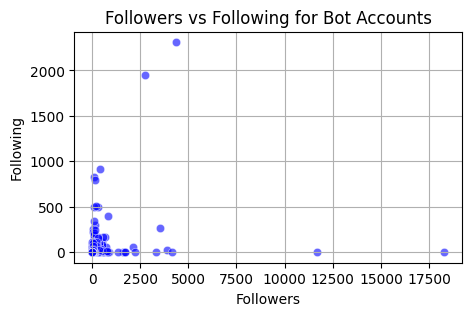

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('change3.csv')
df_bot = df[df['label'] == 'Bot']
plt.figure(figsize=(5, 3))
sns.scatterplot(x='followers', y='following', data=df_bot, color='b', alpha=0.6)
plt.title('Followers vs Following for Bot Accounts')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.grid(True)
plt.show()


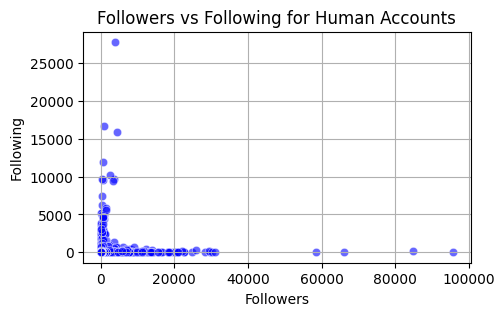

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('change3.csv')
df_bot = df[df['label'] == 'Human']
plt.figure(figsize=(5, 3))
sns.scatterplot(x='followers', y='following', data=df_bot, color='b', alpha=0.6)
plt.title('Followers vs Following for Human Accounts')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.grid(True)
plt.show()


散点图可以清楚地显示 followers 和 following 之间的相关关系。如果大部分账号的 followers 和 following 值较低，那么就会看到一个集中在左下角的区域。若存在一些账号有很多 followers 但相对少的 following，这可能表明这些账号有较强的影响力或更高的活跃度。